In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.shape

(400, 3)

In [5]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Also there is some duplicated values, it the data show us thst it is normal to have multiple people who have the same age and salary and also bought or did not buy the car 

In [6]:
df.groupby("Purchased").count()

,Age,EstimatedSalary
Purchased,,
0,257,257
1,143,143


# Splitting the dataset

In [7]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.75)
print(x_train)
print(x_test)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

# Feature Scaling

### We need to normalize the features (Age and Estimated Salary) in order to minimize the coefficients and achieve convergence in the cost function J(*Beta*)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit_transform(x_train))
scaler.transform(x_test)
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=["Age", "Expected_salary"])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

# fitting the training set into a logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [11]:
lr.coef_

array([[2.07669377, 1.1102991 ]])

In [12]:
lr.intercept_

array([-0.9523224])

In [13]:
lr.score(x_train, y_train)

0.8233333333333334

# Predicting a value in the data set and checking the matches between the predictions and the actual values.

In [15]:
print(lr.predict(scaler.transform([[30, 87000]])))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
y_pred_train = lr.predict(x_train)
print(np.concatenate((y_pred_train.reshape(len(y_pred_train),1), y_train.reshape(len(y_train),1)),1))

[[0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]

Checking the confusion matrix and the accuracy of our data training set.

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
cm
# we predicted that 172 person did not buy the car.
# 75 person bought the car.
# 17 person did buy the car but our model predicted that they not.
# 36 person did not buy the car but our model predicted that they did.

array([[172,  17],
       [ 36,  75]])

In [19]:
y_pred_test = lr.predict(scaler.transform(x_test))
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[65,  3],
       [ 8, 24]])

Text(69.0, 0.5, 'expected label')

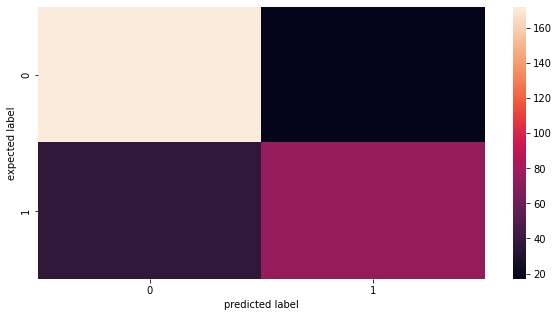

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(cm)
plt.xlabel("predicted label")
plt.ylabel("expected label")

In [ ]:
accuracy_score(y_train, y_pred_train)

0.8233333333333334

Visualizing the Train Dataset

In [ ]:
x_train

,Age,Expected_salary
0,0.581649,-0.886707
1,-0.606738,1.461738
2,-0.012544,-0.567782
3,-0.606738,1.896635
4,1.373907,-1.408584
...,...,...
295,0.977778,-1.147645
296,-0.903834,-0.770734
297,-0.210609,-0.509796
298,-1.101899,-0.451810


No handles with labels found to put in legend.


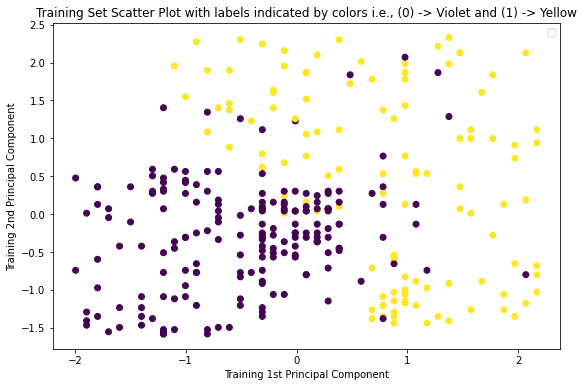

In [ ]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_train.Age, x_train.Expected_salary, c = y_train)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


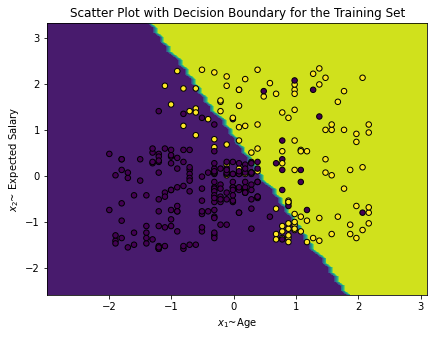

In [25]:
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = x_train.Age.min() - 1, x_train.Age.max() + 1
y_min, y_max = x_train.Expected_salary.min() - 1, x_train.Expected_salary.max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = lr.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)





plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(x_train.Age, x_train.Expected_salary, c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('$x_1$~Age')
plt.ylabel('$x_2$~ Expected Salary')
plt.title('Scatter Plot with Decision Boundary for the Training Set')

plt.show()
# Our Visuals shows that on the left are the people who did not buy the car and on the right side after the decision boundary are the people whom bought the car
#the purple point on the right side of the decision boundary are the wrong prediction of people who bought the car but were classified as didn't by by our logistic regression.
# the yellow line on the left of the line are the people who did not buy the car but were classified as they did buy the car by our model.
#we need a to use better model of classification.